INSTALLING NDLIB

In [ ]:
pip install ndlib

CHCEKING THE INSTALLATION OF NDLIB



In [ ]:
import ndlib

IPORTING ESSENTIALS

In [ ]:

import networkx as nx



CREATING THE GRAPH OBJECT

In [ ]:
football=nx.read_gml("/content/football.gml")
g=nx.Graph(football)

MODEL SELECTION

In [ ]:
import ndlib.models.epidemics as ep

model = ep.SIRModel(g)

In [ ]:
import json
print(json.dumps(model.parameters, indent=2))

{
  "model": {
    "beta": {
      "descr": "Infection rate",
      "range": [
        0,
        1
      ],
      "optional": false
    },
    "gamma": {
      "descr": "Recovery rate",
      "range": [
        0,
        1
      ],
      "optional": false
    },
    "tp_rate": {
      "descr": "Whether if the infection rate depends on the number of infected neighbors",
      "range": [
        0,
        1
      ],
      "optional": true,
      "default": 1
    }
  },
  "nodes": {},
  "edges": {}
}


In [ ]:
model.available_statuses

{'Infected': 1, 'Removed': 2, 'Susceptible': 0}

In [ ]:
import ndlib.models.ModelConfig as mc

cfg = mc.Configuration()
cfg.add_model_parameter('beta', 0.001) # infection rate
cfg.add_model_parameter('gamma', 0.01) # recovery rate

In [ ]:
cfg.add_model_parameter("percentage_infected", 0.01)
model.set_initial_status(cfg)

In [ ]:
iterations = model.iteration_bunch(200, node_status=True)
iterations

100%|██████████| 200/200 [00:00<00:00, 6877.04it/s]


[{'iteration': 0,
  'node_count': {0: 114, 1: 1, 2: 0},
  'status': {'AirForce': 0,
   'Akron': 0,
   'Alabama': 0,
   'AlabamaBirmingham': 0,
   'Arizona': 0,
   'ArizonaState': 0,
   'Arkansas': 0,
   'ArkansasState': 0,
   'Army': 0,
   'Auburn': 0,
   'BallState': 0,
   'Baylor': 0,
   'BoiseState': 0,
   'BostonCollege': 0,
   'BowlingGreenState': 0,
   'BrighamYoung': 0,
   'Buffalo': 1,
   'California': 0,
   'CentralFlorida': 0,
   'CentralMichigan': 0,
   'Cincinnati': 0,
   'Clemson': 0,
   'Colorado': 0,
   'ColoradoState': 0,
   'Connecticut': 0,
   'Duke': 0,
   'EastCarolina': 0,
   'EasternMichigan': 0,
   'Florida': 0,
   'FloridaState': 0,
   'FresnoState': 0,
   'Georgia': 0,
   'GeorgiaTech': 0,
   'Hawaii': 0,
   'Houston': 0,
   'Idaho': 0,
   'Illinois': 0,
   'Indiana': 0,
   'Iowa': 0,
   'IowaState': 0,
   'Kansas': 0,
   'KansasState': 0,
   'Kent': 0,
   'Kentucky': 0,
   'LouisianaLafayette': 0,
   'LouisianaMonroe': 0,
   'LouisianaState': 0,
   'LouisianaT

In [ ]:
trends = model.build_trends(iterations)
trends

[{'trends': {'node_count': {0: [114,
     114,
     114,
     114,
     114,
     114,
     114,
     114,
     114,
     114,
     114,
     114,
     114,
     114,
     114,
     114,
     114,
     114,
     114,
     114,
     114,
     114,
     114,
     114,
     114,
     114,
     114,
     114,
     114,
     114,
     114,
     114,
     114,
     114,
     114,
     114,
     114,
     114,
     114,
     114,
     114,
     114,
     114,
     114,
     114,
     114,
     114,
     114,
     114,
     114,
     114,
     114,
     114,
     114,
     114,
     114,
     114,
     114,
     114,
     114,
     114,
     114,
     114,
     114,
     114,
     114,
     114,
     114,
     114,
     114,
     114,
     114,
     114,
     114,
     114,
     114,
     114,
     114,
     114,
     114,
     114,
     114,
     114,
     114,
     114,
     114,
     114,
     114,
     114,
     114,
     114,
     114,
     114,
     114,
     114,
     114,
     114,
   

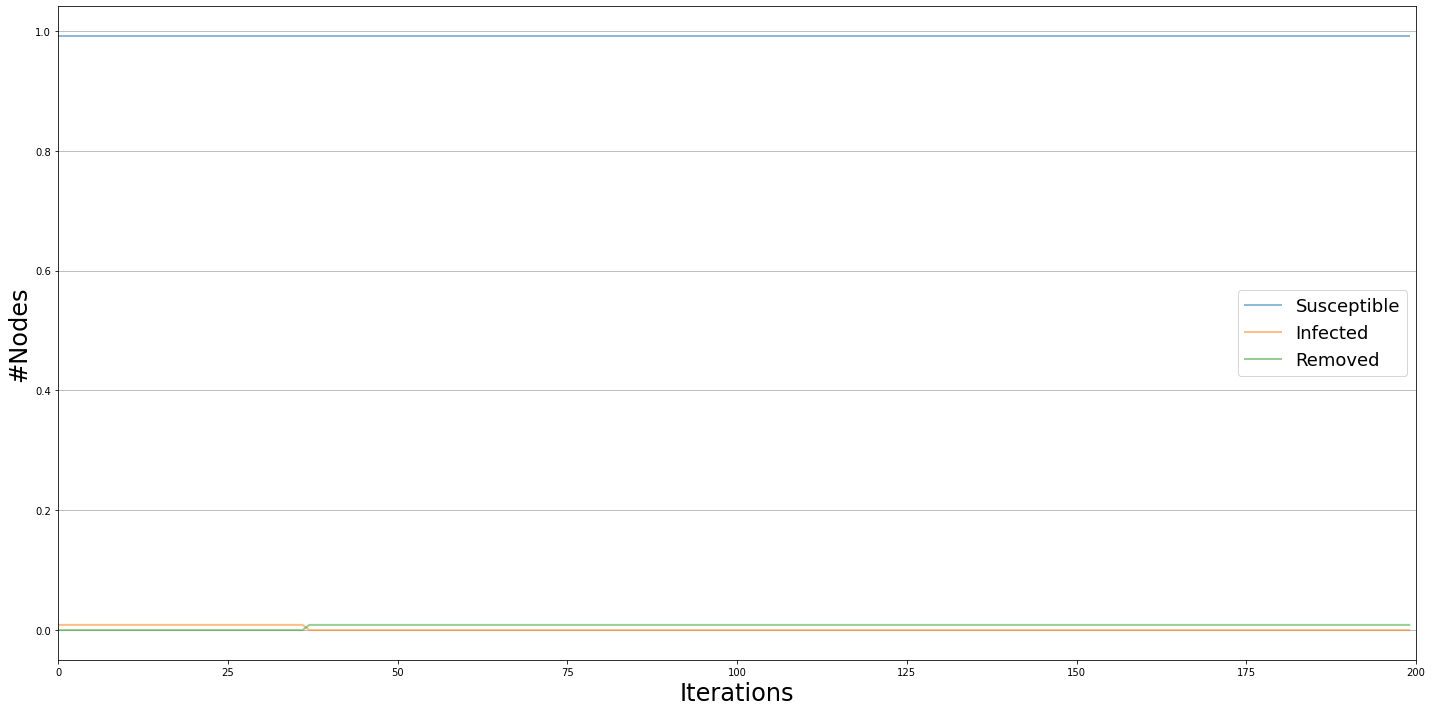

In [ ]:
%matplotlib inline
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend
viz = DiffusionTrend(model, trends)
viz.plot()

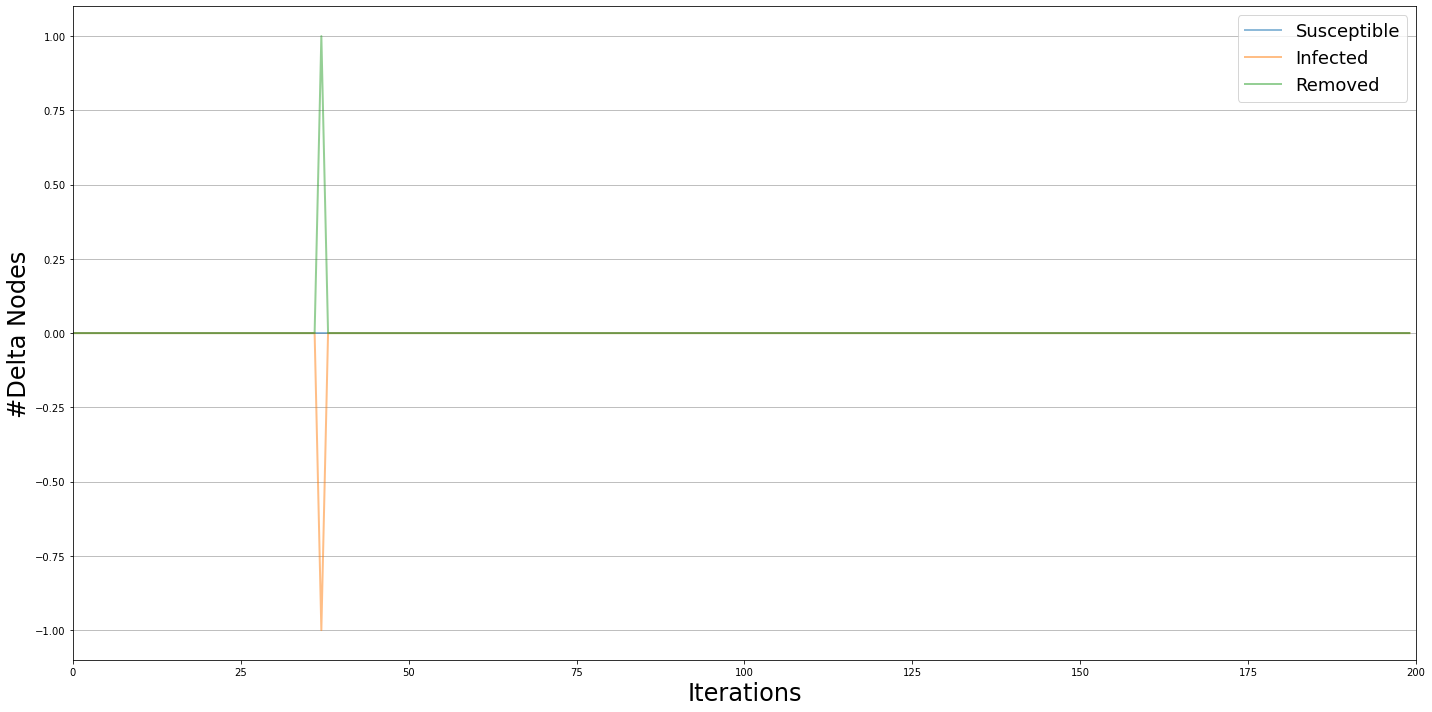

In [ ]:
from ndlib.viz.mpl.DiffusionPrevalence import DiffusionPrevalence
viz = DiffusionPrevalence(model, trends)
viz.plot()

In [ ]:
model = ep.ThresholdModel(g)

config = mc.Configuration()
config.add_model_parameter('percentage_infected', 0.1)

threshold = 0.25
for i in g.nodes():
    config.add_node_configuration("threshold", i, threshold) # node attribute setting

model.set_initial_status(config)

In [ ]:
model = ep.IndependentCascadesModel(g)

config = mc.Configuration()
config.add_model_parameter('percentage_infected', 0.1)

threshold = 0.1
for e in g.edges():
    config.add_edge_configuration("threshold", e, threshold) # edge attribute setting

model.set_initial_status(config)

In [ ]:
import ndlib.models.ModelConfig as mc

# Model Configuration
config = mc.Configuration()

infected_nodes = [0, 1, 2, 3, 4, 5]
config.add_model_initial_configuration("Infected", infected_nodes)

In [ ]:
from ndlib.utils import multi_runs
import warnings
warnings.filterwarnings("ignore")

model = ep.SIRModel(g)
config = mc.Configuration()
config.add_model_parameter('beta', 0.001)
config.add_model_parameter('gamma', 0.01)
config.add_model_parameter("percentage_infected", 0.1)
model.set_initial_status(config)

trends = multi_runs(model, execution_number=10, iteration_number=500, nprocesses=4)

100%|██████████| 500/500 [00:00<00:00, 2542.53it/s]


In [ ]:
model = ep.SIRModel(g)

config = mc.Configuration()
config.add_model_parameter('beta', 0.001)
config.add_model_parameter('gamma', 0.01)
model.set_initial_status(config)

infection_sets = [(1, 2, 3, 4, 5), (3, 23, 22, 5, 2), (1, 2, 12, 26, 3), (4, 6, 9) ]
trends1 = multi_runs(model, execution_number=4, iteration_number=500, infection_sets=infection_sets, nprocesses=4)

100%|██████████| 500/500 [00:00<00:00, 8435.20it/s]


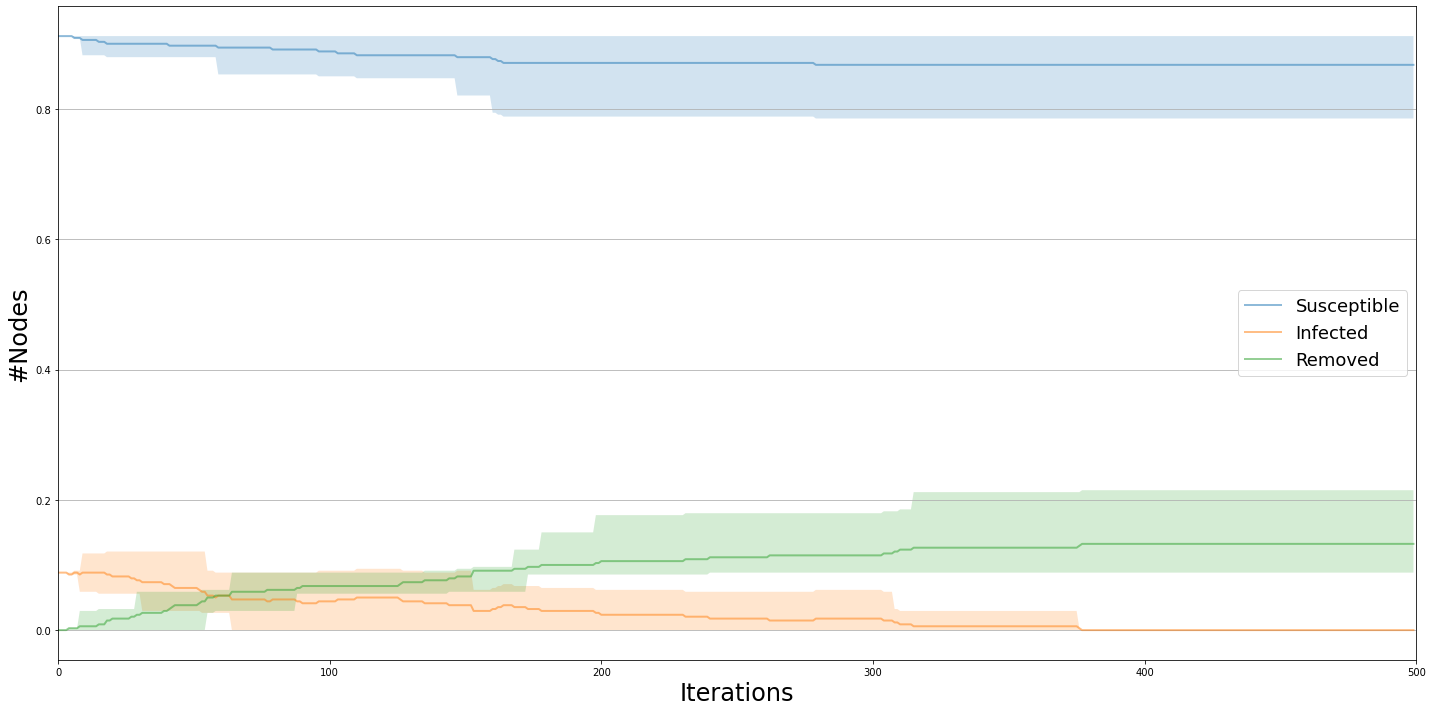

In [ ]:
viz = DiffusionTrend(model, trends)
viz.plot(percentile=90)

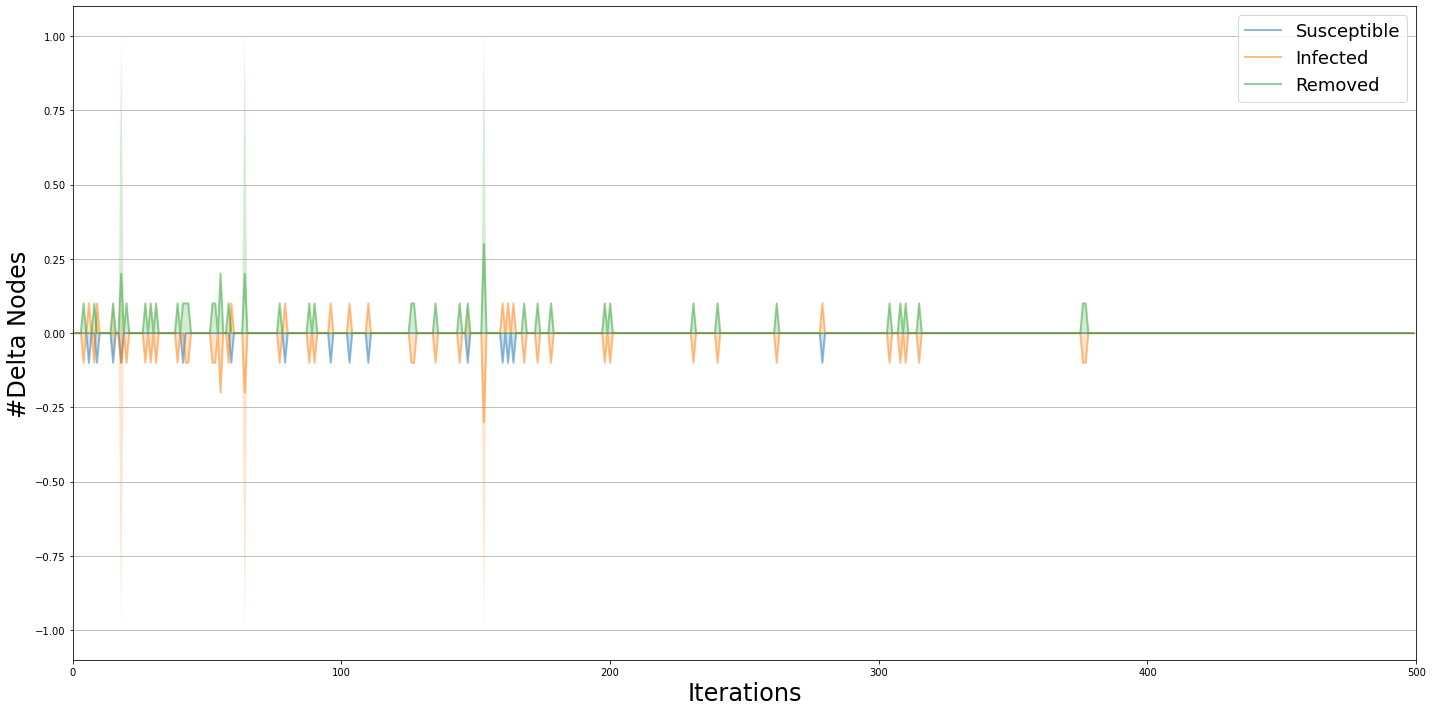

In [ ]:
viz = DiffusionPrevalence(model, trends)
viz.plot(percentile=90)

In [ ]:
model1 = ep.SIModel(g)
cfg = mc.Configuration()
cfg.add_model_parameter('beta', 0.001)
cfg.add_model_parameter("percentage_infected", 0.01)
model1.set_initial_status(cfg)

trends1 = multi_runs(model1, execution_number=10, iteration_number=500, nprocesses=4)

100%|██████████| 500/500 [00:00<00:00, 3357.62it/s]


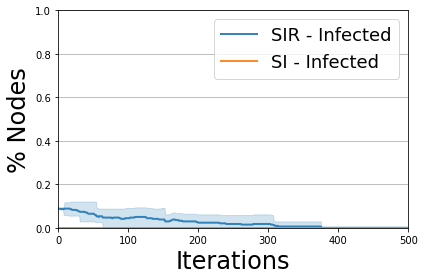

In [ ]:
from ndlib.viz.mpl.TrendComparison import DiffusionTrendComparison
viz = DiffusionTrendComparison([model, model1], [trends, trends1], statuses=['Infected'])
viz.plot()

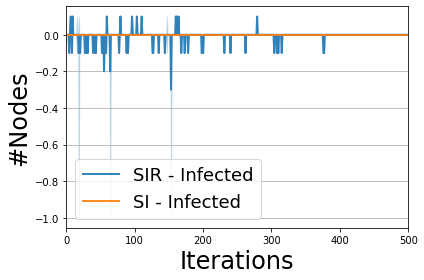

In [ ]:
from ndlib.viz.mpl.PrevalenceComparison import DiffusionPrevalenceComparison
viz = DiffusionPrevalenceComparison([model, model1], [trends, trends1], statuses=['Infected'])
viz.plot()

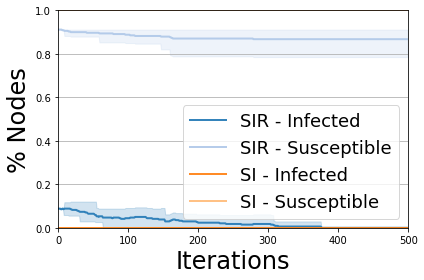

In [ ]:
from ndlib.viz.mpl.TrendComparison import DiffusionTrendComparison
viz = DiffusionTrendComparison([model, model1], [trends, trends1], statuses=['Infected', 'Susceptible'])
viz.plot()

In [ ]:
import dynetx as dn

g = dn.DynGraph() # empty dynamic graph

g.add_interaction(u=1, v=2, t=0, e=2) # adding the edge (1,2) at t=0 that vanishes at time e=2
g.add_interactions_from([(1, 4), (2, 5), (3, 1)], t=1) # adding some edges at time t=1
g.add_interactions_from([(2, 6), (3, 2)], t=2) # adding some edges at time t=2
g.add_interactions_from([(1, 5)], t=3) # adding some edges at time t=3

In [ ]:
g.temporal_snapshots_ids()

[0, 1, 2, 3]

In [ ]:
g1 = g.time_slice(1)
g1.edges()

EdgeView([(1, 2), (1, 4), (1, 3), (2, 5)])

In [ ]:
for i in g.stream_interactions():
    print(i)

(1, 2, '+', 0)
(1, 4, '+', 1)
(2, 5, '+', 1)
(3, 1, '+', 1)
(1, 2, '-', 2)
(2, 6, '+', 2)
(3, 2, '+', 2)
(1, 5, '+', 3)


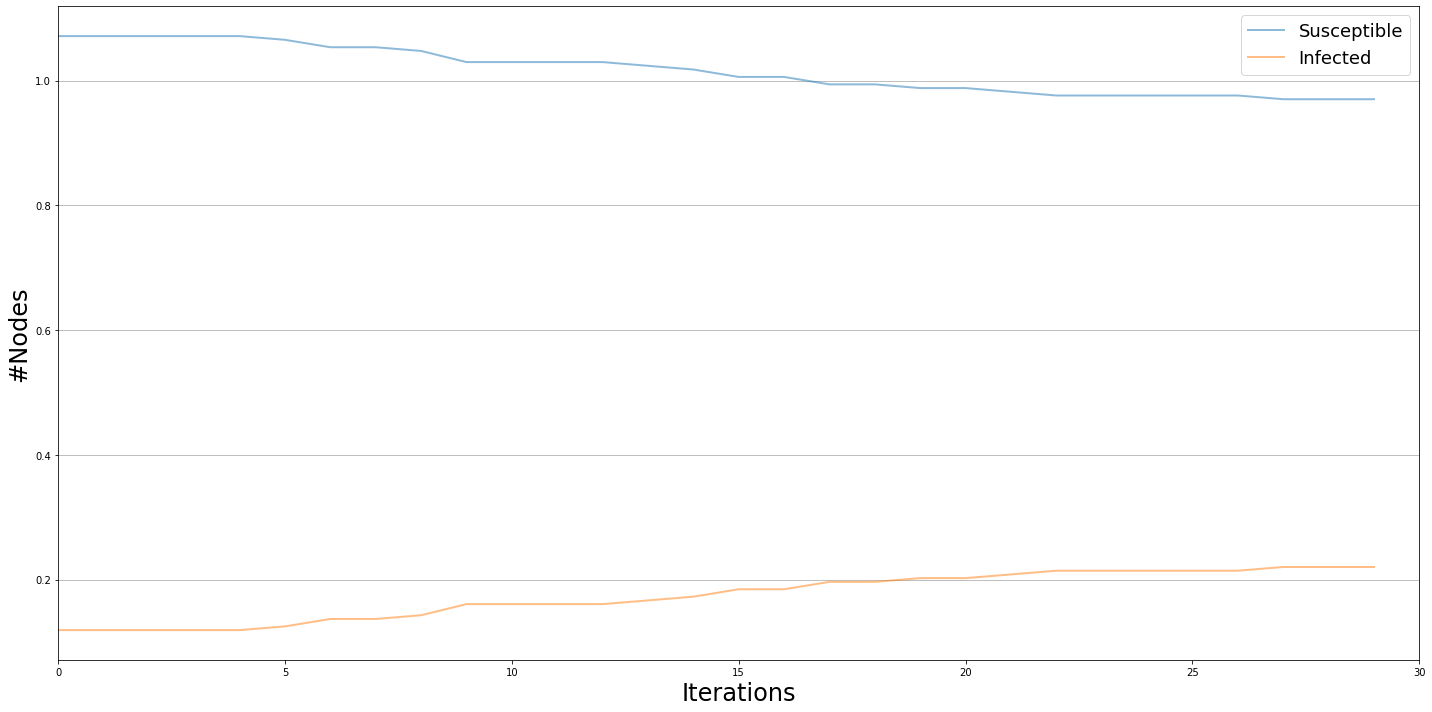

In [ ]:
import ndlib.models.dynamic as dm

# Dynamic Network topology
dg = dn.DynGraph()

# Naive synthetic dynamic graph 
# At each timestep t a new graph having the same set of node ids is created
for t in range(0, 30):
    g = nx.erdos_renyi_graph(200, 0.01)
    dg.add_interactions_from(g.edges(), t)

# Model selection
model = dm.DynSIModel(dg)

# Model Configuration
config = mc.Configuration()
config.add_model_parameter('beta', 0.01)
config.add_model_parameter("percentage_infected", 0.1)
model.set_initial_status(config)

# Simulate snapshot based execution
iterations = model.execute_snapshots()
trends = model.build_trends(iterations)

viz = DiffusionTrend(model, trends)
viz.plot()

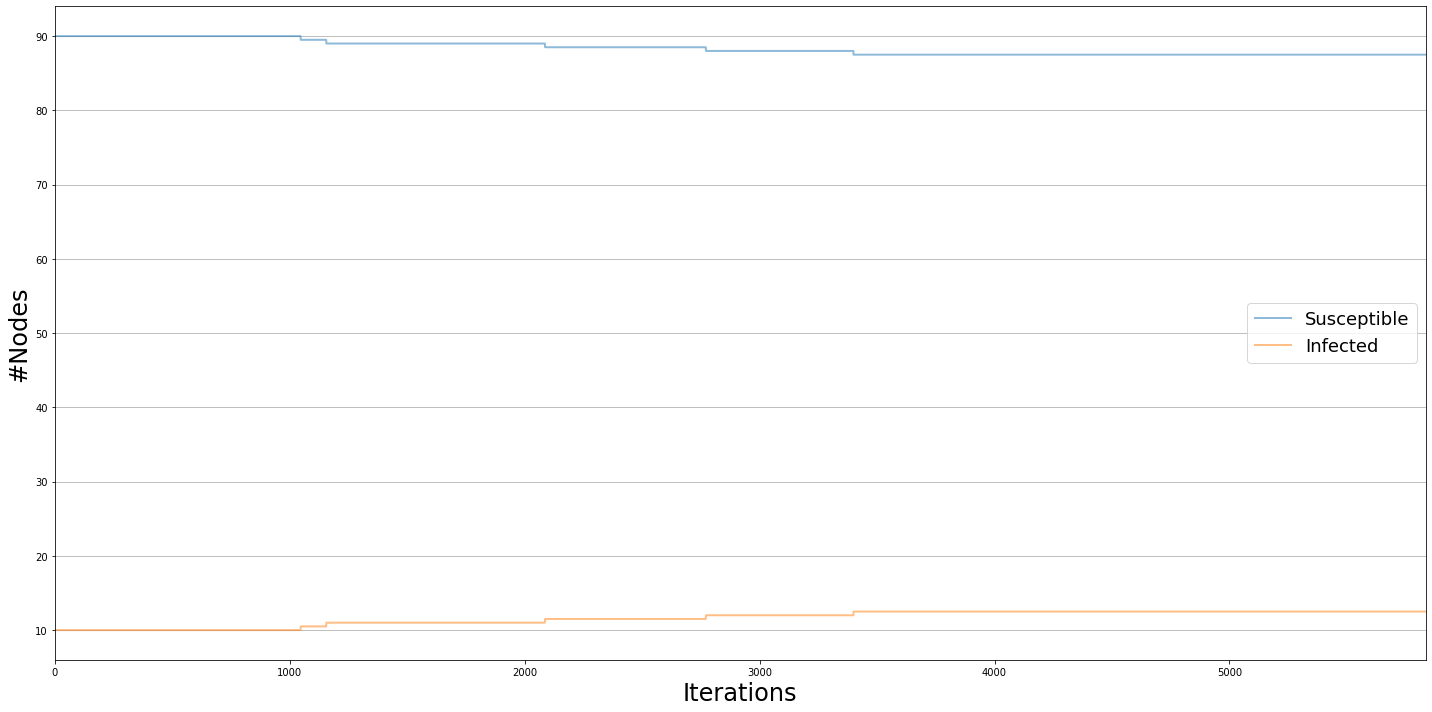

In [ ]:
model = dm.DynSIModel(dg)

# Model Configuration
config = mc.Configuration()
config.add_model_parameter('beta', 0.01)
config.add_model_parameter("percentage_infected", 0.1)
model.set_initial_status(config)

# Simulation interaction graph based execution
iterations = model.execute_iterations()
trends = model.build_trends(iterations)

viz = DiffusionTrend(model, trends)
viz.plot()